In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, roc_auc_score
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_csv(r'E:\Chiranth\studies\miniproject\student_feedback_5.csv', encoding='latin-1')
except pd.errors.ParserError as e:
    print("ParserError:", e)
    # Skip bad lines
    df = pd.read_csv(r'E:\Chiranth\studies\miniproject\student_feedback_5.csv', encoding='latin-1', on_bad_lines='skip')

print(df.head())

   Rating                                           Feedback
0       2  Poor poor poor not recommended poor disappoint...
1       4  Good satisfactory nice worthwhile enjoyable go...
2       2  Disappointing poor not recommended disappointing.
3       4  Satisfactory enjoyable enjoyable enjoyable enj...
4       1                                Awful worst regret.


In [3]:
#Checking for existing file path is correct or not
import os
file_path = r'E:/Chiranth/studies/miniproject/student_feedback_5.csv'
print(os.path.exists(file_path)) 

True


In [4]:
#Data cleaning from the column interms of other character than strings
print(df['Feedback'].head())
print(df['Feedback'].dtype)

0    Poor poor poor not recommended poor disappoint...
1    Good satisfactory nice worthwhile enjoyable go...
2    Disappointing poor not recommended disappointing.
3    Satisfactory enjoyable enjoyable enjoyable enj...
4                                  Awful worst regret.
Name: Feedback, dtype: object
object


In [5]:
df['Feedback'] = df['Feedback'].astype(str)

In [6]:
def data_cleaning(content):
    if not isinstance(content, str):  # Check if content is not a string
        content = str(content)  # Convert to string
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    return content

In [7]:
#Displaying all column names
print(df.columns)

Index(['Rating', 'Feedback'], dtype='object')


Unique classes in the 'Label' column: ['negative' 'positive' 'neutral']
Class distribution in the 'Label' column:
 Label
positive    212
negative    200
neutral      88
Name: count, dtype: int64

Unique classes in the 'SIA_Label' column: ['negative' 'positive' 'neutral']
Class distribution in the 'SIA_Label' column:
 SIA_Label
positive    313
negative    177
neutral      10
Name: count, dtype: int64
Accuracy on Test Set:  1.0
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00        40
     neutral       1.00      1.00      1.00        18
    positive       1.00      1.00      1.00        42

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



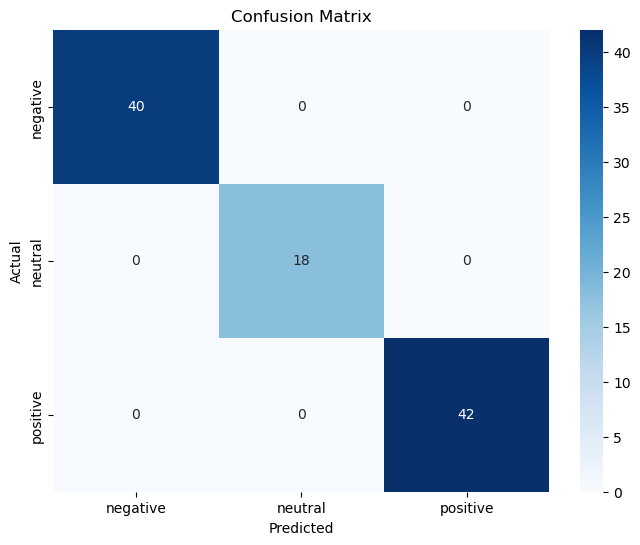

AUC Score:  1.0
F1 Score on Test Set:  1.0
Precision Score on Test Set:  1.0
Recall Score on Test Set:  1.0


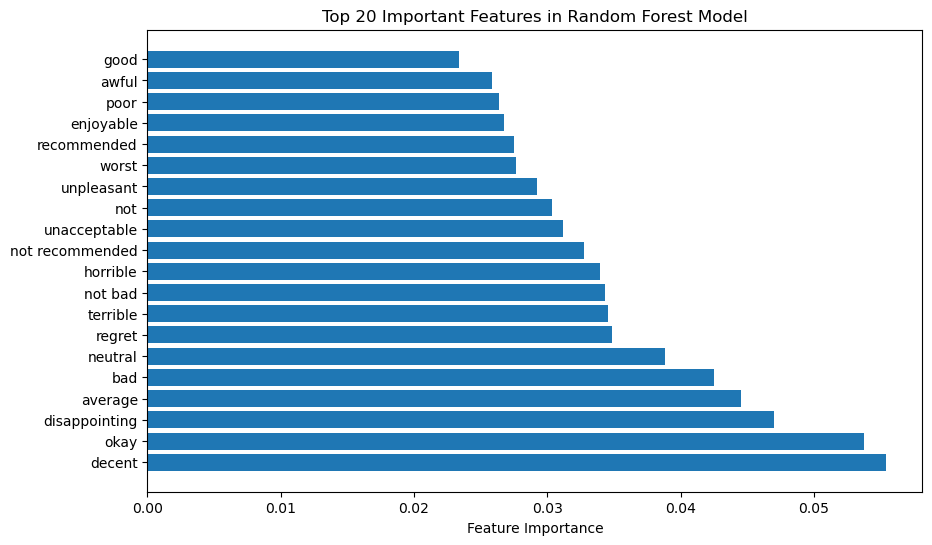

In [8]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = ["would", "shall", "could", "might"]
stop_words.update(custom_stopwords)
stop_words.discard("not")  # Keep 'not' for sentiment analysis

# Initialize SentimentIntensityAnalyzer for advanced sentiment analysis
sia = SentimentIntensityAnalyzer()

# Text cleaning functions
def remove_special_character(content):
    return re.sub(r'\W+', ' ', content)

def remove_url(content):
    return re.sub(r'http\S+', '', content)

def lemmatize_and_remove_stopwords(content):
    return " ".join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(content) if word.lower() not in stop_words and word.isalpha()])

def data_cleaning(content):
    content = remove_special_character(content)
    content = remove_url(content)
    content = lemmatize_and_remove_stopwords(content)
    return content

# Sentiment Classification based on Rating
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Assuming 'df' is your DataFrame with 'Rating' and 'Feedback' columns
df['Cleaned_Feedback'] = df['Feedback'].apply(data_cleaning)
df['Label'] = df['Rating'].apply(assign_sentiment)

# Alternatively, use SentimentIntensityAnalyzer for more advanced sentiment classification
def classify_sentiment_using_sia(feedback):
    sentiment_score = sia.polarity_scores(feedback)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['SIA_Label'] = df['Cleaned_Feedback'].apply(classify_sentiment_using_sia)

# Verify the new 'Label' and 'SIA_Label' columns
print("Unique classes in the 'Label' column:", df['Label'].unique())
print("Class distribution in the 'Label' column:\n", df['Label'].value_counts())

print("\nUnique classes in the 'SIA_Label' column:", df['SIA_Label'].unique())
print("Class distribution in the 'SIA_Label' column:\n", df['SIA_Label'].value_counts())

# Split dataset
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df['Label'])

class LemmaTokenizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    
    def __call__(self, doc):
        return [self.lemmatizer.lemmatize(word) for word in word_tokenize(doc)]

# Feature extraction with n-grams and enhanced TfidfVectorizer
tfidfvect = TfidfVectorizer(tokenizer=LemmaTokenizer(), ngram_range=(1, 3), min_df=5, max_features=10000)

# Transform the feedback into TF-IDF features
x_train_tfidf = tfidfvect.fit_transform(train['Cleaned_Feedback']).toarray()
x_test_tfidf = tfidfvect.transform(test['Cleaned_Feedback']).toarray()

# Labels
y_train = train['Label']
y_test = test['Label']

# Model training with Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)  # Added hyperparameter tuning
model.fit(x_train_tfidf, y_train)

# Model Evaluation
y_pred = model.predict(x_test_tfidf)

# Evaluate model performance
print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix plot function
def confusion_matrix_plot(y_test, y_pred, labels=['negative', 'neutral', 'positive']):
    conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Confusion Matrix plot
confusion_matrix_plot(y_test, y_pred)

# AUC Score for multi-class classification (one-vs-rest approach)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)  # One-hot encoding of y_test
y_pred_proba = model.predict_proba(x_test_tfidf)  # Probabilities for each class

# Compute the AUC score for each class
auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr', average='macro')
print("AUC Score: ", auc_score)

# F1-Score Calculation for Model Evaluation
f1_score_test = f1_score(y_test, y_pred, average="weighted")
print("F1 Score on Test Set: ", f1_score_test)

# Precision and Recall for Model Evaluation
from sklearn.metrics import precision_score, recall_score
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')

print("Precision Score on Test Set: ", precision_test)
print("Recall Score on Test Set: ", recall_test)

# Feature Importance Plot
def plot_feature_importance(model, tfidf_vect):
    feature_importance = model.feature_importances_
    top_n = 20  # Show top 20 important features
    top_n_idx = feature_importance.argsort()[-top_n:][::-1]
    top_features = [tfidf_vect.get_feature_names_out()[i] for i in top_n_idx]
    top_importance = feature_importance[top_n_idx]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_importance)
    plt.xlabel("Feature Importance")
    plt.title("Top 20 Important Features in Random Forest Model")
    plt.show()

# Call to plot the feature importance
plot_feature_importance(model, tfidfvect)


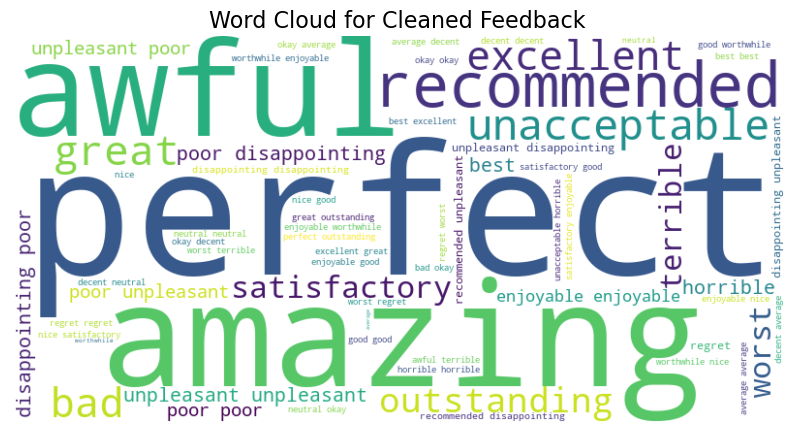

In [9]:
from wordcloud import WordCloud

# Function to generate a word cloud
def generate_wordcloud(text_data):
    # Combine all feedback into a single string
    feedback_text = " ".join(text_data)
    
    # Create and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(feedback_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Cleaned Feedback', fontsize=16)
    plt.show()

# Generate Word Cloud for the Cleaned Feedback data
generate_wordcloud(df['Cleaned_Feedback'])


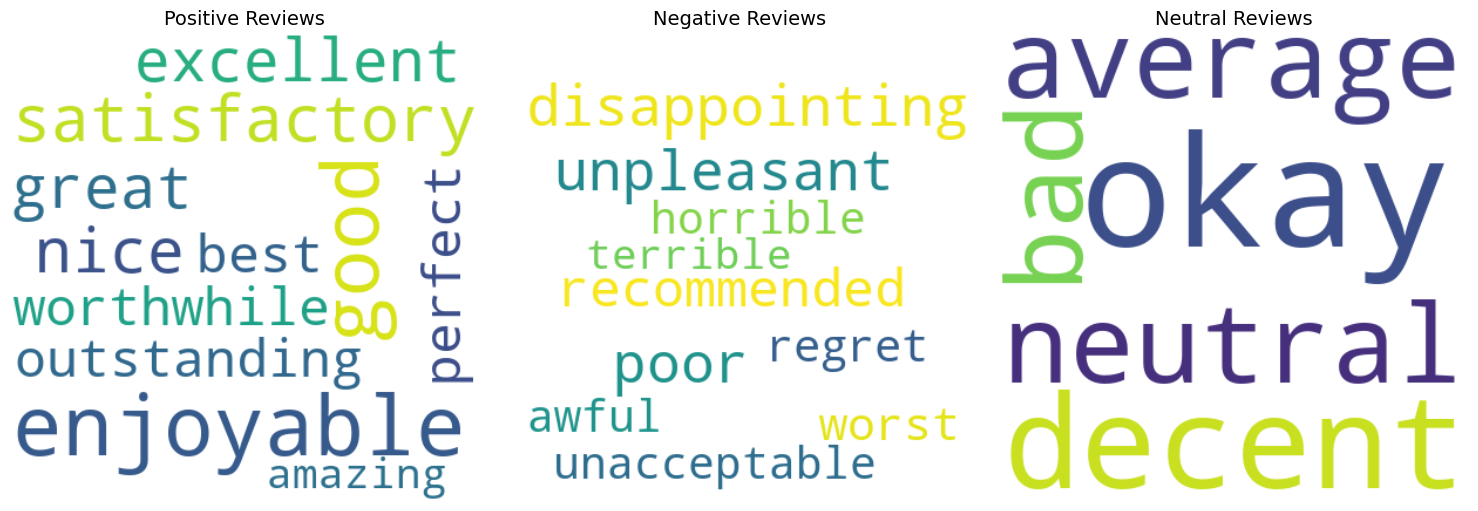

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate a word cloud for each sentiment class
def generate_wordcloud_for_classes(df):
    # Separate the feedback data based on the sentiment labels
    positive_feedback = df[df['Label'] == 'positive']['Cleaned_Feedback']
    negative_feedback = df[df['Label'] == 'negative']['Cleaned_Feedback']
    neutral_feedback = df[df['Label'] == 'neutral']['Cleaned_Feedback']
    
    # Combine all feedback for each sentiment class
    positive_text = " ".join(positive_feedback)
    negative_text = " ".join(negative_feedback)
    neutral_text = " ".join(neutral_feedback)

    # Create a word cloud for each class
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Positive Word Cloud
    positive_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=200).generate(positive_text)
    axes[0].imshow(positive_wordcloud, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title('Positive Reviews', fontsize=14)

    # Negative Word Cloud
    negative_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=200).generate(negative_text)
    axes[1].imshow(negative_wordcloud, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title('Negative Reviews', fontsize=14)

    # Neutral Word Cloud
    neutral_wordcloud = WordCloud(width=400, height=400, background_color='white', max_words=200).generate(neutral_text)
    axes[2].imshow(neutral_wordcloud, interpolation='bilinear')
    axes[2].axis('off')
    axes[2].set_title('Neutral Reviews', fontsize=14)

    # Display the word clouds
    plt.tight_layout()
    plt.show()

# Generate Word Clouds for each sentiment class
generate_wordcloud_for_classes(df)


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

# Initialize necessary tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = ["would", "shall", "could", "might"]
stop_words.update(custom_stopwords)
stop_words.discard("not")  # Keep 'not' for sentiment analysis
sia = SentimentIntensityAnalyzer()

# Text cleaning functions
def remove_special_character(content):
    return re.sub(r'\W+', ' ', content)

def remove_url(content):
    return re.sub(r'http\S+', '', content)

def lemmatize_and_remove_stopwords(content):
    return " ".join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(content) if word.lower() not in stop_words and word.isalpha()])

def data_cleaning(content):
    content = remove_special_character(content)
    content = remove_url(content)
    content = lemmatize_and_remove_stopwords(content)
    return content

# Sentiment classification based on rating
def assign_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

# Sentiment classification using SIA
def classify_sentiment_using_sia(feedback):
    sentiment_score = sia.polarity_scores(feedback)
    if sentiment_score['compound'] >= 0.05:
        return 'positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Sample data for training the model (replace with more comprehensive data in practice)
data = {
    'Feedback': [
        "Great product, loved it!",
        "Horrible experience, will not buy again.",
        "It was okay, nothing special.",
        "Absolutely fantastic service!",
        "Very bad quality, disappointed.",
    ],
    'Rating': [5, 1, 3, 5, 2]
}
df = pd.DataFrame(data)

# Data cleaning and labeling
df['Cleaned_Feedback'] = df['Feedback'].apply(data_cleaning)
df['Label'] = df['Rating'].apply(assign_sentiment)

# Feature extraction with TfidfVectorizer
tfidfvect = TfidfVectorizer(ngram_range=(1, 3), min_df=1, max_features=1000)
x_train_tfidf = tfidfvect.fit_transform(df['Cleaned_Feedback']).toarray()
y_train = df['Label']

# Model training with Random Forest
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(x_train_tfidf, y_train)

# Function to process user input and predict sentiment
def analyze_feedback():
    try:
        feedback = input("Enter your feedback: ")
        
        # Validate rating input
        while True:
            try:
                rating = int(input("Enter your rating (1-5): "))
                if 1 <= rating <= 5:
                    break  # Exit the loop if the rating is valid
                else:
                    print("Please enter a valid rating between 1 and 5.")
            except ValueError:
                print("Invalid input. Please enter a number between 1 and 5.")

        # Clean and process input
        cleaned_feedback = data_cleaning(feedback)
        print(f"Cleaned Feedback: {cleaned_feedback}")  # Debugging output

        # Sentiment analysis by rating
        sentiment_by_rating = assign_sentiment(rating)
        print(f"Sentiment by Rating: {sentiment_by_rating}")  # Debugging output

        # Sentiment analysis by SIA
        sentiment_by_sia = classify_sentiment_using_sia(cleaned_feedback)
        print(f"Sentiment by SIA: {sentiment_by_sia}")  # Debugging output

        # Predict sentiment using the model
        feedback_tfidf = tfidfvect.transform([cleaned_feedback]).toarray()
        predicted_sentiment = model.predict(feedback_tfidf)[0]

        print(f"Predicted Sentiment by Model: {predicted_sentiment}")  # Debugging output
    except Exception as e:
        print(f"Error: {str(e)}")

# Run the analysis function
analyze_feedback()